# 01 - Training, Validation, Testing

We are at the moment only testing our accuracy on our test data after we submit it to Kaggle.

Submissions to Kaggle are limited, so we should rather try to test on our training data already.

What we want is to split the train data into:

1. a set we want to train on
2. a set we use only for validating our training

Let's start out with a validation set of size  **1/3**

In [39]:
%load_ext autoreload
%autoreload 2


import tools.extract as e
import tools.transform as t

train, test = e.load("data")

DATA_SIZE = len(train)
VALIDATION_SIZE = int(len(train) * 1/8)
TRAIN_SIZE = DATA_SIZE - VALIDATION_SIZE

from sklearn.utils import shuffle

shuffled = shuffle(train)

validation_set = shuffled [ TRAIN_SIZE: ]
training_set = shuffled [ :TRAIN_SIZE ]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import tools.extract as e
import tools.transform as t

# 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
# 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

features = ['Pclass', 'Sex', 'Age']

def transform(data):
    selected = t.select(data, features)
    selected["Sex"], _ = ( t.encode_categories( selected, "Sex" ))
    selected["Age"] = t.set_NaN(selected, "Age", 0)
    return selected

import tools.classifiers.decision_tree as dt
import tools.predict as p

labels = training_set['Survived']

tree = dt.DecisionTree(features)
p.train(tree, transform(training_set), labels)

val_predictions = p.predict(tree, transform(validation_set))
train_predictions = p.predict(tree, transform(training_set))

ID = "PassengerId"
LABEL = "Survived"

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [51]:
def accuracy( predicted, ground_truth ):
    correct = (predicted == ground_truth).sum()
    print( "correct/total: " + str(correct) +"/"+ str(len(predicted)))
    print( "accuracy: " + str(correct/len(predicted)) )
    return correct/len(predicted)

print("Training data:")
accuracy(train_predictions, training_set['Survived'])
print("\n\nValidation data:")
accuracy(val_predictions, validation_set['Survived'])

Training data:
correct/total: 692/780
accuracy: 0.887179487179


Validation data:
correct/total: 86/111
accuracy: 0.774774774775


0.77477477477477474

## Cool! Now we are set to rumble!

Let us try different depth limitations for the tree

In [52]:
max_depths = list(range(1,30))

training_acc = []
validation_acc = []

for i in max_depths:
    tree = dt.DecisionTree(features, max_depth = i)
    p.train(tree, transform(training_set), labels)

    val_predictions = p.predict(tree, transform(validation_set))
    train_predictions = p.predict(tree, transform(training_set))
    
    print("Max Depth: " + str(i))
    print("Training data:")
    training_acc.append(accuracy(train_predictions, training_set['Survived']))
    print("\n\nValidation data:")
    validation_acc.append(accuracy(val_predictions, validation_set['Survived']))
    
    print("\n----------------")


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Max Depth: 1
Training data:
correct/total: 613/780
accuracy: 0.785897435897


Validation data:
correct/total: 88/111
accuracy: 0.792792792793

----------------
Max Depth: 2
Training data:
correct/total: 614/780
accuracy: 0.787179487179


Validation data:
correct/total: 87/111
accuracy: 0.783783783784

----------------
Max Depth: 3
Training data:
correct/total: 624/780
accuracy: 0.8


Validation data:
correct/total: 87/111
accuracy: 0.783783783784

----------------
Max Depth: 4
Training data:
correct/total: 636/780
accuracy: 0.815384615385


Validation data:
correct/total: 81/111
accuracy: 0.72972972973

----------------
Max Depth: 5
Training data:
correct/total: 645/780
accuracy: 0.826923076923


Validation data:
correct/total: 85/111
accuracy: 0.765765765766

----------------
Max Depth: 6
Training data:
correct/total: 656/780
accuracy: 0.841025641026


Validation data:
correct/total: 81/111
accuracy: 0.72972972973

----------------
Max Depth: 7
Training data:
correct/total: 663/780
ac

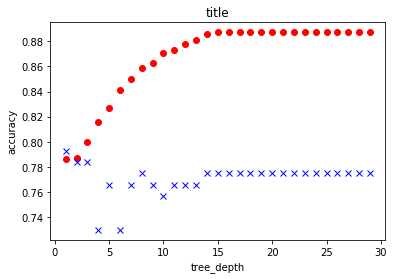

In [55]:
from pylab import *
import matplotlib.pyplot as plt

figure()
plt.plot(max_depths, training_acc, 'o', color='red')
plt.plot(max_depths, validation_acc, 'x', color='blue')

plt.xlabel('tree_depth')
plt.ylabel('accuracy')
plt.title('title')
plt.show()